<a href="https://colab.research.google.com/github/saeu5407/daily_tensorflow/blob/main/LSTM_%EC%9C%A0%ED%98%95_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 유형 소개

다양한 LSTM 유형에 대해 알아보도록 하겠습니다.<br>
LSTM 레이어는 상황에 따라 SimpleRNN, GRU 등 다른 모델로 변경하실 수 있습니다.

대부분의 내용은 하단 원본 블로그의 글, 코드를 따라 구현하며 작업했습니다.
[유형 소개 원본 블로그](https://blog.naver.com/chunjein/221589705745)

## 단방향 단층 LSTM

### many-to-one



In [15]:
# many-to-one
from keras.models import Model
from keras.layers import Input, Dense, LSTM
import numpy as np

x = np.array([[[1],[2],[3]],[[2],[3],[4]],[[3],[4],[5]]])
y = np.array([[4],[5],[6]])

model_input  = Input(batch_shape=(None, 3, 1))
model_lstm   = LSTM(3)(model_input)
model_output = Dense(1)(model_lstm)

model = Model(model_input, model_output)
model.compile(loss='mean_squared_error', optimizer='adam')

print(model.summary())
model.fit(x, y, epochs=50, batch_size=1, verbose=0)
model.predict(x, batch_size=1)

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 3, 1)]            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 3)                 60        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 4         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
None


array([[0.8964497],
       [0.941995 ],
       [0.9591358]], dtype=float32)

### many-to-many

#### 기본적인 구조

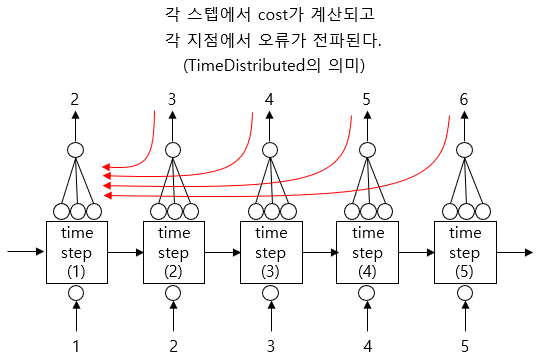

In [16]:
# many-to-many
"""
return_sequences = True : 중간 스탭의 출력을 사용할 지에 대한 파라미터
TimeDistributed : many-to-many에 사용되는 방법으로, 각 시간별로 출력되는 모든 출력에 대해 cost를 구할 수 있게 해준다.
"""
from keras.models import Model
from keras.layers import Input, Dense, LSTM
from keras.layers import TimeDistributed
import numpy as np

x = np.array([[[1],[2],[3]],[[2],[3],[4]],[[3],[4],[5]]])
y = np.array([[[2],[3],[4]],[[3],[4],[5]],[[5],[6],[7]]])

model_input  = Input(batch_shape=(None, 3, 1))
model_lstm   = LSTM(3, return_sequences=True)(model_input)
model_output = TimeDistributed(Dense(1))(model_lstm)

model = Model(model_input, model_output)
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary)

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7f30240bf2d0>>


#### TimeDistributed를 넣지 않는 경우

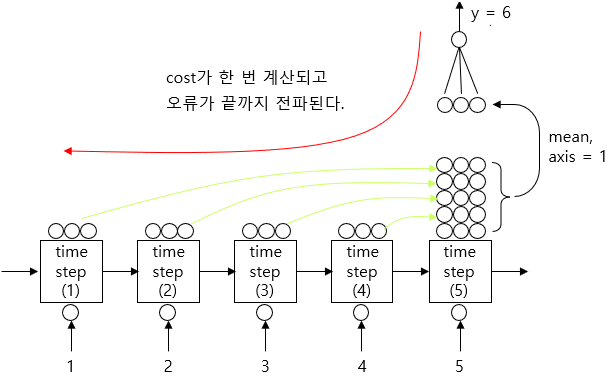

## 양방향 단층 LSTM

bidirectional LSTM은 순차적인 입력값에 대해 이전 데이터와의 관계뿐만 아니라 이후 데이터와의 관계까지도 학습합니다.

양방향 LSTM에는 Forward와 Backward 레이어가 있습니다.
예시를 들어보면 X = {1,2,3,4,5}일 때 세번째 스텝에서는 Forward와 Backward 레이어에 각각 3이 입력됩니다. Forward 레이어는 1 -> 2 -> 3의 시퀀스가 학습되고, Backward 레이어는 3 <- 4 <- 5의 시퀀스가 학습됩니다. 그럼 LSTM의 세번째 출력은 입력 3에 대해 이전과의 관계뿐만 아니라 이후 관계에 대한 정보도 가지게 됩니다.

양방향 LSTM에서는 Bidirectional() 함수를 사용합니다.

### many-to-one

return_sequence=False 옵션인 거 정도를 체크할 수 있다.
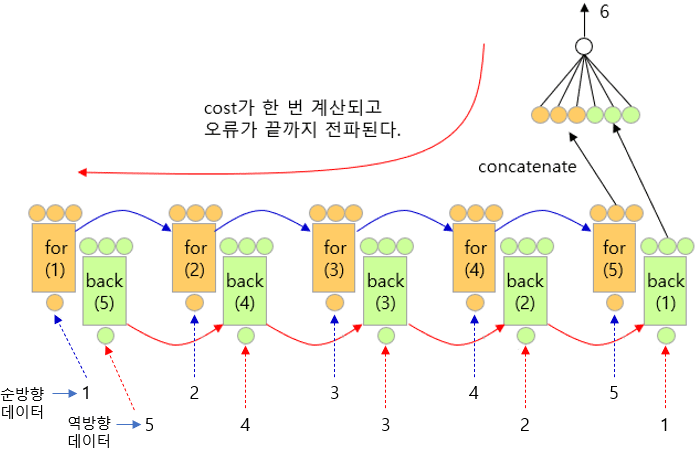

In [17]:
# Bidirectional many-to-one
from keras.models import Model
from keras.layers import Input, Dense, LSTM
from keras.layers import Bidirectional, TimeDistributed
import numpy as np

x = np.array([[[1],[2],[3]],[[2],[3],[4]],[[3],[4],[5]]])
y = np.array([[4],[5],[6]])

model_input  = Input(batch_shape=(None, 3, 1))
model_bilstm   = Bidirectional(LSTM(3), merge_mode = 'concat')(model_input)
model_output = Dense(1)(model_bilstm)

model = Model(xInput, xOutput)
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 5, 1)]            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 3)                 60        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
None


### many-to-many

당연히 return_sequence=True, TimeDistributed를 사용한 걸 체크할 수 있다.

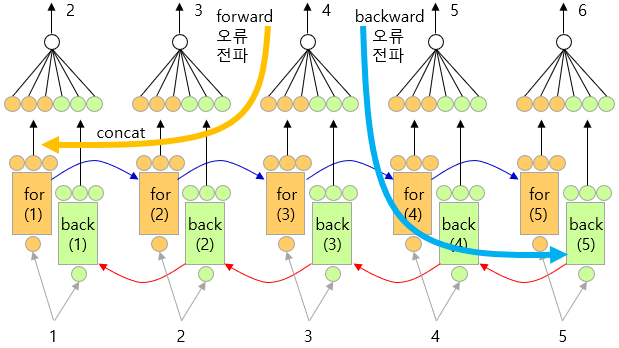

In [18]:
# Bidirectional many-to-many
from keras.models import Model
from keras.layers import Input, Dense, LSTM
from keras.layers import Bidirectional, TimeDistributed
import numpy as np

x = np.array([[[1],[2],[3]],[[2],[3],[4]],[[3],[4],[5]]])
y = np.array([[[2],[3],[4]],[[3],[4],[5]],[[5],[6],[7]]])

model_input  = Input(batch_shape=(None, 3, 1))
model_bilstm   = Bidirectional(LSTM(3, return_sequences=True), merge_mode = 'concat')(model_input)
model_output = TimeDistributed(Dense(1))(model_bilstm)

model = Model(model_input, model_output)
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 3, 1)]            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 3, 6)              120       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 3, 1)              7         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________
None


## 다층 구조의 단방향/양방향 LSTM

다층 구조 중 두개의 LSTM을 적층한 이층 구조의 LSTM을 실습해보겠습니다.
주의할 점은 LSTM 1층에서 return_sequences=True를 사용합니다. 즉 저층의 모든 스텝의 출력이 위층으로 전달되기 위해 이 옵션을 사용합니다.

### 단방향 many-to-one

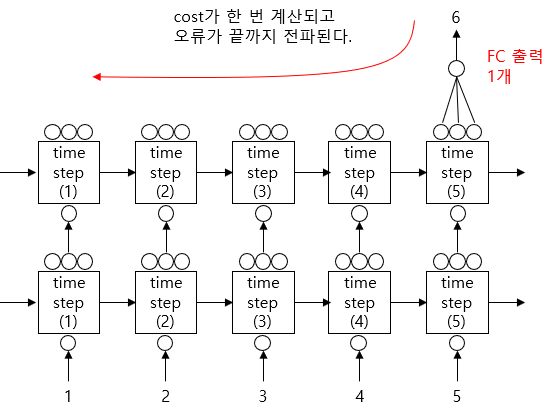

In [19]:
# stacked many-to-one
from keras.models import Model
from keras.layers import Input, Dense, LSTM
import numpy as np

x = np.array([[[1],[2],[3]],[[2],[3],[4]],[[3],[4],[5]]])
y = np.array([[4],[5],[6]])

model_input  = Input(batch_shape=(None, 3, 1))
model_lstm1  = LSTM(3, return_sequences=True)(model_input) # 하위 층에서만 return_sequences=True를 사용
model_lstm2  = LSTM(3)(model_lstm1)
model_output = Dense(1)(model_lstm2)

model = Model(model_input, model_output)
model.compile(loss='mean_squared_error', optimizer='adam')

print(model.summary())
model.fit(x, y, epochs=50, batch_size=1, verbose=0)
model.predict(x, batch_size=1)

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 3, 1)]            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 3, 3)              60        
_________________________________________________________________
lstm_12 (LSTM)               (None, 3)                 84        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 4         
Total params: 148
Trainable params: 148
Non-trainable params: 0
_________________________________________________________________
None


array([[0.3391824 ],
       [0.33436304],
       [0.32728738]], dtype=float32)

### 양방향 many-to-one

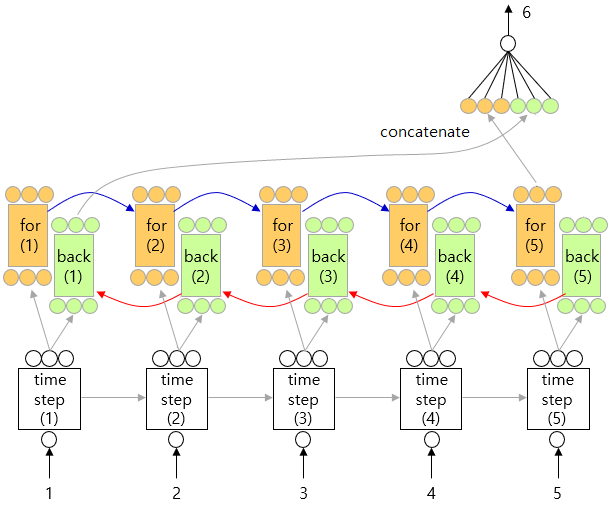

In [20]:
# stacked Bidirectional many-to-one
from keras.models import Model
from keras.layers import Input, Dense, LSTM
from keras.layers import Bidirectional, TimeDistributed
import numpy as np

x = np.array([[[1],[2],[3]],[[2],[3],[4]],[[3],[4],[5]]])
y = np.array([[4],[5],[6]])

model_input   = Input(batch_shape=(None, 3, 1))
model_bilstm1 = LSTM(3, return_sequences=True)(model_input)
model_bilstm2 = Bidirectional(LSTM(3))(model_bilstm1)
model_output  = Dense(1)(model_bilstm2)

model = Model(xInput, xOutput)
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 5, 1)]            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 3)                 60        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
None


### 다층 구조의 many-to-many는?

똑같이 앞의 LSTM은 return_sequences=True를,
뒤의 마지막 LSTM에서도 many-to-many는 return_sequences=True 옵션을 사용합니다.
또한 마지막 레이어에 TimeDistributed를 적용하여 모든 출력에 대한 코스트를 구하게 작업하면 됩니다.

### Input과 Output의 길이를 다르게 하려면?

이 때는 인코더, 디코더의 개념으로 작업을 진행합니다

인코더 LSTM 레이어로 many-to-one을 사용한 후,
RepeatVector등으로 길이를 원하는 갯수로 맞춰줍니다.<br>
이후 many-to-many 유형의 디코더를 사용하여 마무리합니다.

In [47]:
# encoder decoder
from keras.models import Model
from keras.layers import Input, Dense, LSTM
from keras.layers import TimeDistributed, RepeatVector
import numpy as np

x = np.array([[[1],[2],[3]],[[2],[3],[4]],[[3],[4],[5]]])
y = np.array([[[2],[3],[4],[5],[6]],[[3],[4],[5],[6],[7]],[[5],[6],[7],[8],[9]]])

model_input   = Input(batch_shape=(None, 3, 1))
model_encoder = LSTM(10, return_sequences=False)(model_input) # many-to-one을 하기 위해 False
model_repeat  = RepeatVector(5)(model_encoder)
model_decoder = LSTM(10, return_sequences=True)(model_repeat) # many-to-many를 하기 위해 True
model_output = TimeDistributed(Dense(1))(model_decoder)

model = Model(model_input, model_output)
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary)

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7f302493d8d0>>


# 실습

sin 함수에 노이즈를 섞은 데이터를 활용해,<br>
이층 구조의 양방향 many-to-one 모델을 만들어 실습해보도록 하겠습니다.

[실습 원본 블로그](https://blog.naver.com/chunjein/221589705745)

## 데이터 생성

In [33]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, LSTM, Bidirectional
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

# 배치용 함수 생성
"""
데이터에 대해 한칸씩 순서대로 shift하며 n개의 데이터를 뽑은 후,
그 n개를 data / 이후 1개를 target으로 배치하는 함수
즉 n개의 데이터로 이후 1개를 예측하는 LSTM이라고 보면 쉽다.
"""
def generateX(a, n):
    x_train = []
    y_train = []
    for i in range(len(a)):
        x = a[i:(i + n)]
        if (i + n) < len(a):
            x_train.append(x)
            y_train.append(a[i + n])
        else:
            break
    return np.array(x_train), np.array(y_train)

# 데이터 생성
data = np.sin(2 * np.pi * 0.03 * np.arange(0, 100)) + np.random.random(100)
# 싸인함수생성 # 에 노이즈를 약간 섞어 데이터 100개 생성
x, y = generateX(data, 10) # 정의한 함수로 제너레이트
x = x.reshape(-1,10,1) # 배치를 위해 reshape
y = y.reshape(-1,1)

# 트레이닝 셋, 테스트 셋 분리
x_train = x[:70, :, :]
y_train = y[:70:, :]
x_test = x[70:, :, :]
y_test = y[70:, :]
x_train.shape

(70, 10, 1)

## 모델 생성 및 훈련

In [43]:
# 이층 구조의 양방향 many-to-one LSTM
K.clear_session() # 모델 생성전에 tensorflow의 graph 영역을 clear한다.

# 모델(내 스타일대로 작성. 저는 add가 편합니다.)
model = Sequential()
model.add(Input(batch_shape=(None, x_train.shape[1], x_train.shape[2])))
model.add(LSTM(10, return_sequences = True))
model.add(Bidirectional(LSTM(10)))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.summary()

# 훈련
model.fit(x_train, y_train, epochs=500, batch_size=20, verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 10)            480       
_________________________________________________________________
bidirectional (Bidirectional (None, 20)                1680      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 2,181
Trainable params: 2,181
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
4/4 [==============================] - 4s 11ms/step - loss: 1.2684
Epoch 2/500
4/4 [==============================] - 0s 11ms/step - loss: 1.1862
Epoch 3/500
4/4 [==============================] - 0s 13ms/step - loss: 1.1200
Epoch 4/500
4/4 [==============================] - 0s 10ms/step - loss: 1.0628
Epoch 5/500
4/4 [==============================] - 0s 11ms/step - lo

## 예측 및 시각화

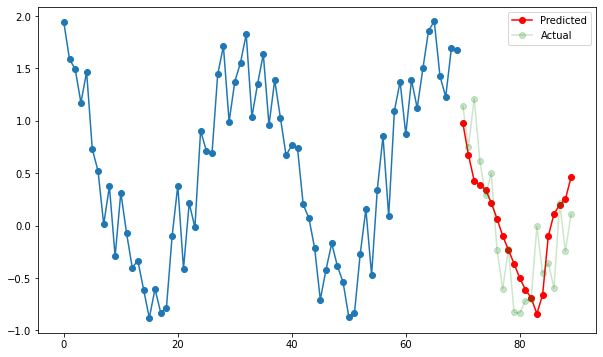

In [38]:
# 예측
y_hat = model.predict(x_test, batch_size=1)

# 예측 결과 시각화
a_axis = np.arange(0, len(y_train))
b_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(10,6))
plt.plot(a_axis, y_train.reshape(70,), 'o-')
plt.plot(b_axis, y_hat.reshape(20,), 'o-', color='red', label='Predicted')
plt.plot(b_axis, y_test.reshape(20,), 'o-', color='green', alpha=0.2, label='Actual')
plt.legend()
plt.show()